In [530]:
# imports
import numpy as np

In [531]:
# parameters
n = 100                 # number of data points
d = 1                   # number of features
scale = 10              # controls how large synthetic data gets
num_iters = 100000      # number of iterations that it spends training
learning_rate = 0.001   # controls how much gradient descent affects the change to theta
noise = 2               # amount of deviation

In [532]:
X = np.random.rand(n, d) * scale            # random feature values
X_aug = np.hstack([np.ones((n, 1)), X])     # combine the feature matrix with a column of ones

In [533]:
theta_true = (np.random.rand(d+1, 1) - 0.5) * scale    # initialize the true value for theta

In [534]:
y = X_aug @ theta_true + noise * np.random.randn(n, 1)  # calculate the y values and add Gaussian noise for variation

In [535]:
theta = np.zeros(shape=(d+1, 1))    # initialize our theta vector which will be adapted

In [536]:
for _ in range(num_iters):          # repeat our gradient descent loop to minimize squared error

    y_hat = X_aug @ theta               # compute our predicted y values

    resid = y_hat - y                   # calculate the signed residual

    grad = (1 / n) * (X_aug.T @ resid)  # compute gradient of mean squared error

    theta -= learning_rate * grad       # update parameters to reduce error


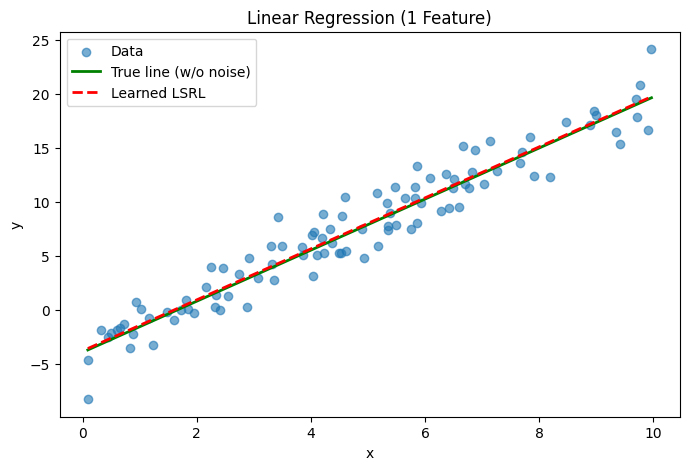

In [537]:
import matplotlib.pyplot as plt

if d == 1:
    # extract x values
    x = X[:, 0]

    # sort for a clean line
    idx = np.argsort(x)
    x_sorted = x[idx]

    # build augmented matrix for sorted x
    X_line = np.hstack([np.ones((n, 1)), x_sorted.reshape(-1, 1)])

    # predictions
    y_true_line = X_line @ theta_true
    y_learned_line = X_line @ theta

    # plot
    plt.figure(figsize=(8, 5))
    plt.scatter(x, y, alpha=0.6, label="Data")
    plt.plot(x_sorted, y_true_line, color="green", linewidth=2, label="True line (w/o noise)")
    plt.plot(x_sorted, y_learned_line, color="red", linestyle="--", linewidth=2, label="Learned LSRL")

    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("Linear Regression (1 Feature)")
    plt.legend()
    plt.show()

In [538]:
print(f"\n{'Parameter':<10} | {'True':>10} | {'Learned':>10} | {'Error':>10}")
print("-" * 50)

for i in range(d + 1):
    name = "bias" if i == 0 else f"x{i}"
    true_val = theta_true[i, 0]
    learned_val = theta[i, 0]
    error = learned_val - true_val

    print(f"{name:<10} | {true_val:10.5f} | {learned_val:10.5f} | {error:10.5f}")



Parameter  |       True |    Learned |      Error
--------------------------------------------------
bias       |   -3.90525 |   -3.77370 |    0.13155
x1         |    2.36027 |    2.35720 |   -0.00307
